In [1]:
import numpy as np

from mlxtend.data import boston_housing_data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from lightgbm import LGBMRegressor
import catboost
from catboost import CatBoostRegressor

from scipy.stats import bootstrap

import matplotlib.pyplot as plt

## load data
- http://rasbt.github.io/mlxtend/user_guide/data/boston_housing_data/#boston_housing_data-the-boston-housing-dataset-for-regression

- LightGBM and CatBoost models are not carefully tuned, which doesn't impact this demonstration

In [2]:
np.random.seed(1)

X, y = boston_housing_data()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True)

## Linear Regression

In [3]:
reg_lr = LinearRegression()
reg_lr.fit(X_train, y_train)

# model evaluation for training set

y_train_predict = reg_lr.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(reg_lr.score(X_train, y_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 4.492698146979513
R2 score is 0.76




In [4]:
pred_error_lr = y_train - y_train_predict

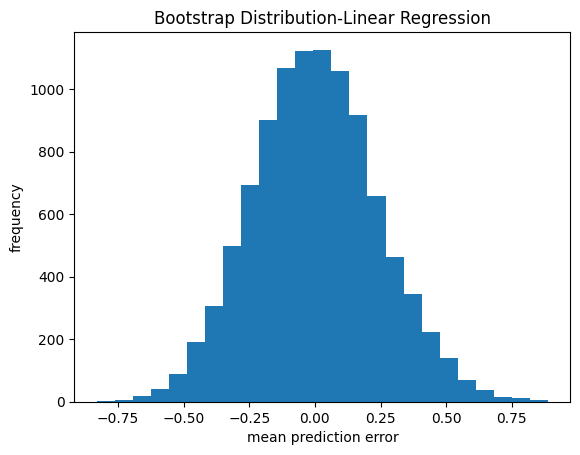

In [5]:
rng = np.random.default_rng()

data = (pred_error_lr,)  # samples must be in a sequence
res = bootstrap(data, np.mean, confidence_level=0.9,
                random_state=rng)
fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution, bins=25)
ax.set_title('Bootstrap Distribution-Linear Regression')
ax.set_xlabel('mean prediction error')
ax.set_ylabel('frequency')
plt.show()

## LightGBM
- https://juliaai.github.io/DataScienceTutorials.jl/end-to-end/boston-lgbm/

In [6]:
model = LGBMRegressor()
model.fit(X_train, y_train)
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(model.score(X_train, y_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 1.4401737533944294
R2 score is 0.98




In [7]:
pred_error_lgb = y_train - y_train_predict

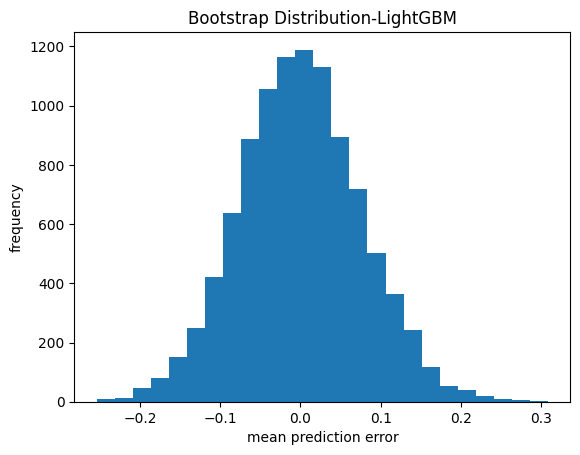

In [8]:
rng = np.random.default_rng()

data = (pred_error_lgb,)  # samples must be in a sequence
res = bootstrap(data, np.mean, confidence_level=0.9,
                random_state=rng)
fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution, bins=25)
ax.set_title('Bootstrap Distribution-LightGBM')
ax.set_xlabel('mean prediction error')
ax.set_ylabel('frequency')
plt.show()

## CatBoost

In [9]:
train_dataset = catboost.Pool(X_train, y_train) 
test_dataset = catboost.Pool(X_test, y_test)

In [10]:
model = CatBoostRegressor(loss_function='RMSE', logging_level='Silent')

In [11]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset, verbose=False)

{'params': {'depth': 6,
  'iterations': 200,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.2},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

In [12]:
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(model.score(X_train, y_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 0.4095848160942447
R2 score is 1.0




In [13]:
pred_error_cat = y_train - y_train_predict

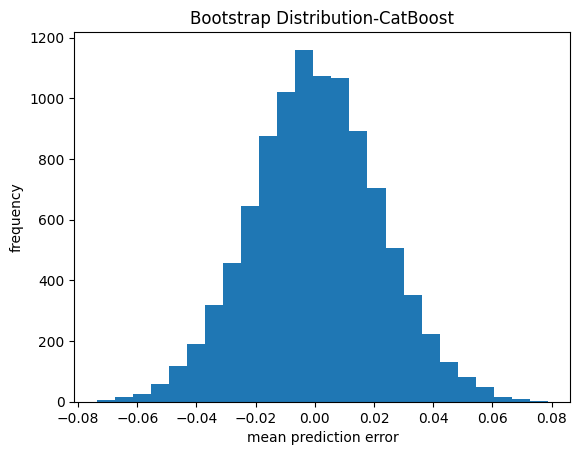

In [14]:
rng = np.random.default_rng()

data = (pred_error_cat,)  # samples must be in a sequence
res = bootstrap(data, np.mean, confidence_level=0.9,
                random_state=rng)
fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution, bins=25)
ax.set_title('Bootstrap Distribution-CatBoost')
ax.set_xlabel('mean prediction error')
ax.set_ylabel('frequency')
plt.show()